In [29]:
# Restart the kernel after installing the following:
# !pip install imblearn
# !pip install -U scikit-learn imbalanced-learn
# !pip install -U scikit-learn xgboost imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Basic imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('attrition_data.csv')

In [3]:
random_state = 25  # define a random state for the entire program

In [4]:
df.sample(5)

,id,customer_id,last_name,credit_score,country,gender,age,tenure,acc_balance,prod_count,has_card,is_active,estimated_salary,exit_status
10156,10156,15659949,P'eng,706.0,Germany,Female,60.0,6,98373.26,1.0,1.0,1.0,77837.63,1
61392,61392,15769917,Onyemauchechukwu,624.0,Germany,Male,38.0,8,128743.80,1.0,0.0,0.0,62845.64,1
1811,1811,15790599,P'eng,NaN,Germany,Female,42.0,7,145726.55,1.0,1.0,0.0,176576.60,1
53726,53726,15643908,Hsing,NaN,Germany,Female,26.0,1,152631.56,1.0,1.0,1.0,27654.44,0
50352,50352,15644896,Manna,745.0,France,Female,21.0,1,0.00,2.0,0.0,1.0,83681.30,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90000.0,4.499950e+04,25980.906451,0.00,22499.75,44999.50,6.749925e+04,89999.00
customer_id,90000.0,1.569209e+07,71297.959941,15565701.00,15633608.00,15690164.00,1.575674e+07,15815690.00
credit_score,80444.0,6.564971e+02,80.016856,350.00,597.00,659.00,7.100000e+02,850.00
age,90000.0,3.811953e+01,8.855203,18.00,32.00,37.00,4.200000e+01,92.00
tenure,90000.0,5.017022e+00,2.804813,0.00,3.00,5.00,7.000000e+00,10.00
acc_balance,82743.0,5.545673e+04,62788.474236,0.00,0.00,0.00,1.198258e+05,250898.09
prod_count,85137.0,1.552932e+00,0.548011,1.00,1.00,2.00,2.000000e+00,4.00
has_card,90000.0,7.542889e-01,0.430510,0.00,1.00,1.00,1.000000e+00,1.00
is_active,90000.0,4.971778e-01,0.499995,0.00,0.00,0.00,1.000000e+00,1.00
estimated_salary,90000.0,1.123947e+05,50360.440702,11.58,74430.36,117505.07,1.548748e+05,199992.48


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                90000 non-null  int64  
 1   customer_id       90000 non-null  int64  
 2   last_name         90000 non-null  object 
 3   credit_score      80444 non-null  float64
 4   country           83979 non-null  object 
 5   gender            90000 non-null  object 
 6   age               90000 non-null  float64
 7   tenure            90000 non-null  int64  
 8   acc_balance       82743 non-null  float64
 9   prod_count        85137 non-null  float64
 10  has_card          90000 non-null  float64
 11  is_active         90000 non-null  float64
 12  estimated_salary  90000 non-null  float64
 13  exit_status       90000 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 9.6+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

id                     0
customer_id            0
last_name              0
credit_score        9556
country             6021
gender                 0
age                    0
tenure                 0
acc_balance         7257
prod_count          4863
has_card               0
is_active              0
estimated_salary       0
exit_status            0
dtype: int64

In [9]:
df.drop(columns=['id'],inplace=True)

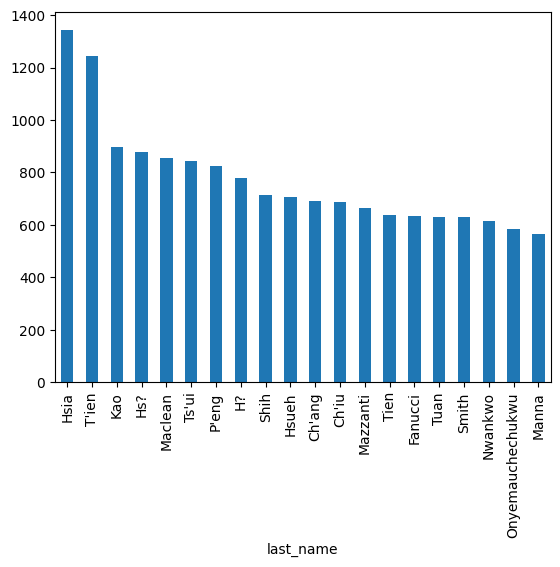

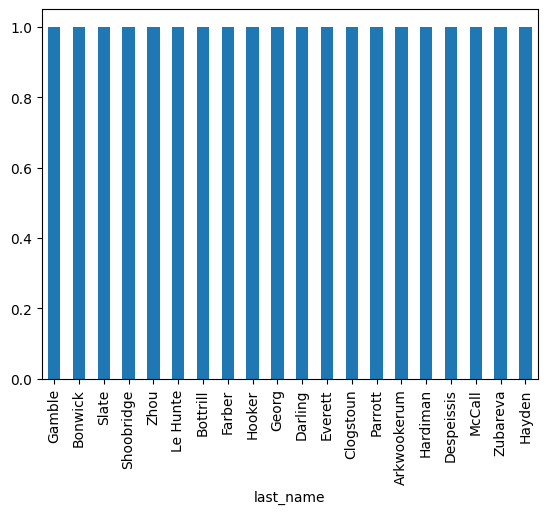

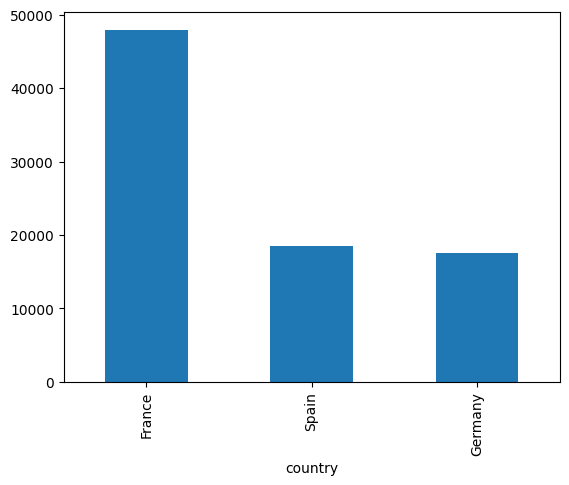

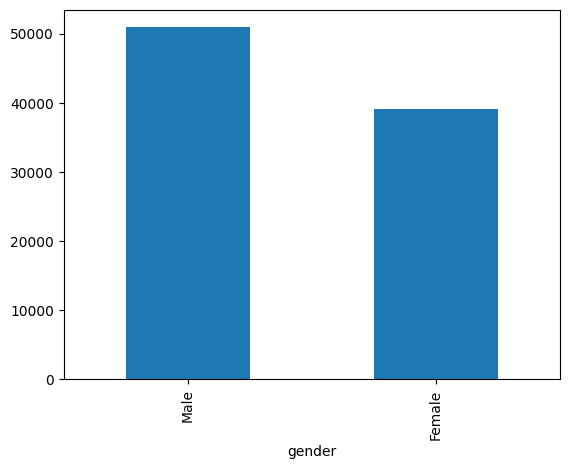

In [10]:
# Looking at all columns and what's their distribution

for col in df.dtypes[df.dtypes == 'object'].index:
    if col == 'last_name':
        df[col].value_counts().sort_values(ascending=False)[:20].plot.bar()
        plt.show()
        df[col].value_counts().sort_values(ascending=True)[:20].plot.bar()
        plt.show()
    else:
        df[col].value_counts().sort_values(ascending=False).plot.bar()
        plt.show()

KDE for credit_score


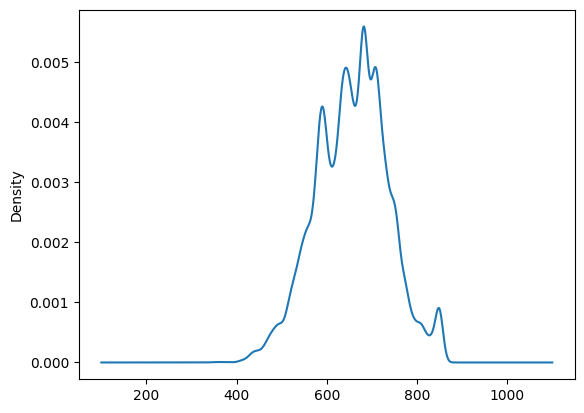

Boxplot for credit_score


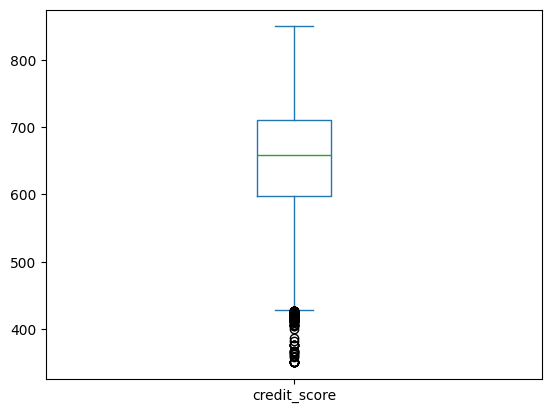

KDE for age


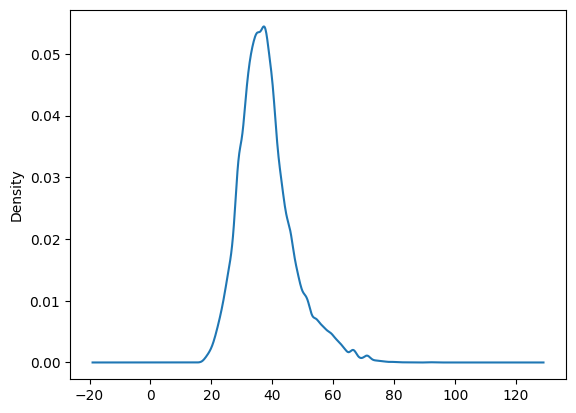

Boxplot for age


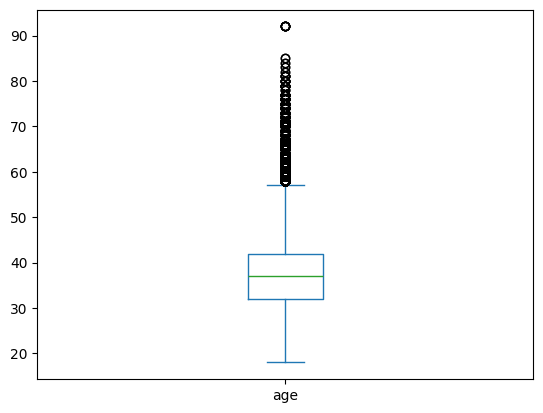

KDE for acc_balance


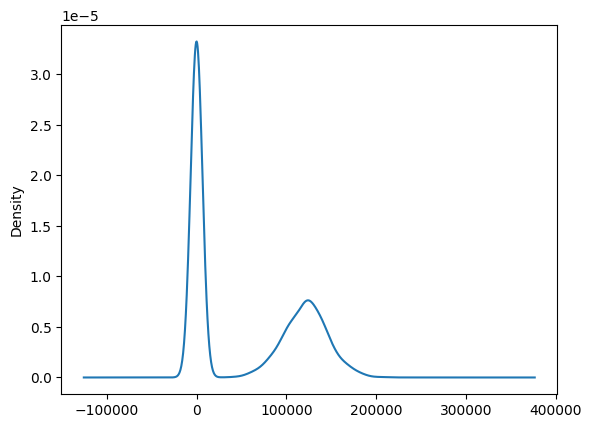

Boxplot for acc_balance


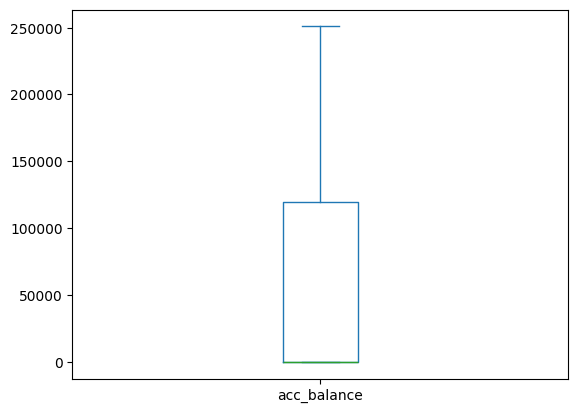

KDE for prod_count


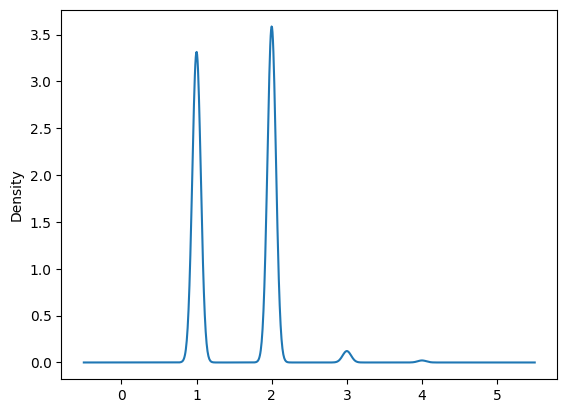

Boxplot for prod_count


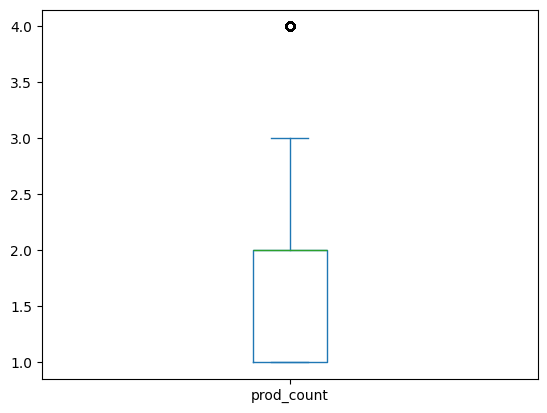

KDE for has_card


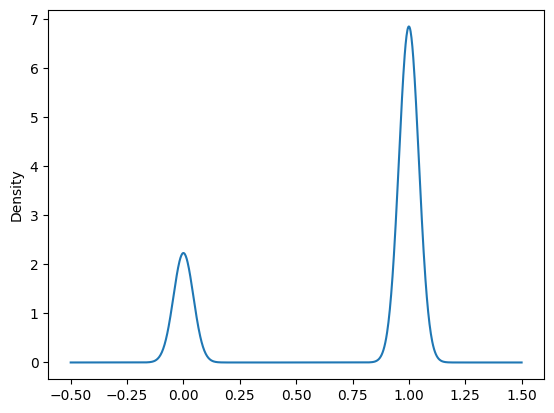

Boxplot for has_card


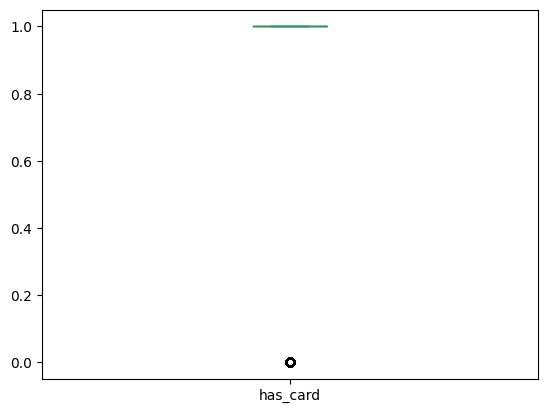

KDE for is_active


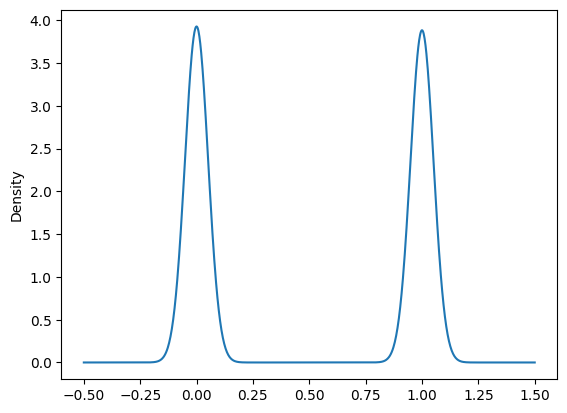

Boxplot for is_active


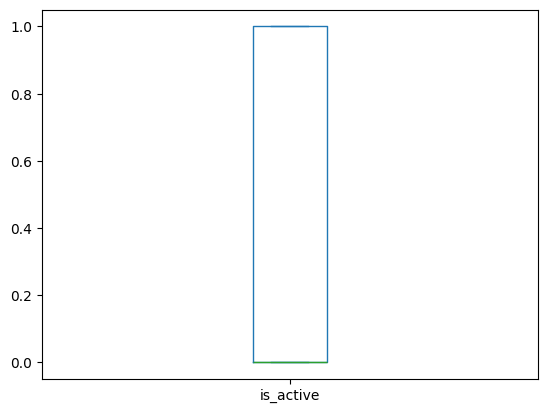

KDE for estimated_salary


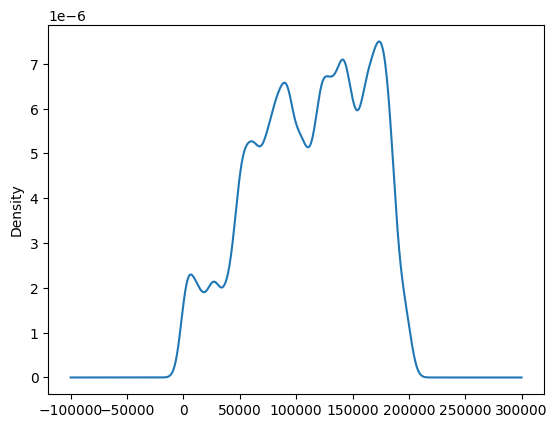

Boxplot for estimated_salary


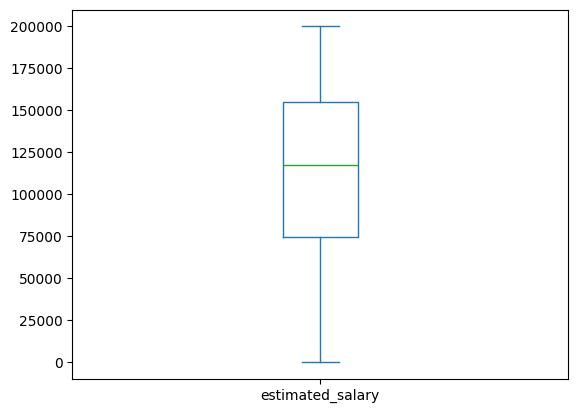

In [11]:
for col in df.dtypes[(df.dtypes == 'int') | (df.dtypes == 'float64')].index:
    if col == 'customer_id':
        pass
    else:
        print(f"KDE for {col}")
        df[col].plot.kde()
        plt.show()
        print(f"Boxplot for {col}")
        df[col].plot.box()
        plt.show()

In [12]:
# For outleirs, we will try different scaling techniques like RobustScaler or StandardScaler to see which performs the best.

In [13]:
df['exit_status'].value_counts()   # imbalanced, we must rely on metrics like precision.

exit_status
0    70956
1    19044
Name: count, dtype: int64

In [14]:
df['prod_count'].value_counts(normalize=True).sort_index().cumsum()

prod_count
1.0    0.470536
2.0    0.979621
3.0    0.996911
4.0    1.000000
Name: proportion, dtype: float64

In [15]:
# Fixing Missing Values

def impute(col):
    '''
    Impute using the distribution a column follows
    '''
    
    cdf = df['prod_count'].value_counts(normalize=True).sort_index().cumsum()
    number = np.random.rand()
    for i in range(len(cdf)):
        if number < cdf.values[i]:
            return cdf.index[i]

df['prod_count'][df['prod_count'].isna()] = df['prod_count'][df['prod_count'].isna()].apply(impute)
df['country'][df['country'].isna()] = df['country'][df['country'].isna()].apply(impute)


In [16]:
df.isna().sum()

customer_id            0
last_name              0
credit_score        9556
country                0
gender                 0
age                    0
tenure                 0
acc_balance         7257
prod_count             0
has_card               0
is_active              0
estimated_salary       0
exit_status            0
dtype: int64

In [17]:
df['last_name'].nunique()

2611

In [18]:
df.drop(columns=['last_name','customer_id'],inplace=True)   # Since we have too many unique values for last_name, no other choice than to drop them.

In [19]:
df.describe()

,credit_score,age,tenure,acc_balance,prod_count,has_card,is_active,estimated_salary,exit_status
count,80444.000000,90000.000000,90000.000000,82743.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,656.497054,38.119533,5.017022,55456.732147,1.553844,0.754289,0.497178,112394.659679,0.211600
std,80.016856,8.855203,2.804813,62788.474236,0.547939,0.430510,0.499995,50360.440702,0.408445
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74430.360000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117505.070000,0.000000
75%,710.000000,42.000000,7.000000,119825.750000,2.000000,1.000000,1.000000,154874.787500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      80444 non-null  float64
 1   country           90000 non-null  object 
 2   gender            90000 non-null  object 
 3   age               90000 non-null  float64
 4   tenure            90000 non-null  int64  
 5   acc_balance       82743 non-null  float64
 6   prod_count        90000 non-null  float64
 7   has_card          90000 non-null  float64
 8   is_active         90000 non-null  float64
 9   estimated_salary  90000 non-null  float64
 10  exit_status       90000 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 7.6+ MB


In [21]:
# Imports for preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

encode_cols = list(X.select_dtypes(include='object').columns)
X_train[encode_cols] = X_train[encode_cols].astype(str)
X_test[encode_cols] = X_test[encode_cols].astype(str)
num_cols = list(X.select_dtypes(include=['int64', 'float64']).columns)

encoder = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer([
    ('encode', encoder, encode_cols)
], remainder='passthrough')  # passthrough numerical columns

full_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('impute', IterativeImputer(random_state=random_state)),
    ('scale', StandardScaler())
])

In [23]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [24]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler(sampling_strategy={0: 20000}, random_state=random_state)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(sampling_strategy=1.0, random_state=random_state)
X_train_balanced, y_train_balanced = smote.fit_resample(X_rus, y_rus)

In [25]:
X_train_balanced.shape

(40000, 15)

In [26]:
df['exit_status'].value_counts()/df['exit_status'].value_counts().sum()

exit_status
0    0.7884
1    0.2116
Name: count, dtype: float64

In [27]:
# Imports for model building & selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import uniform, randint, loguniform

In [28]:
# Initial Models
logreg_pl = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('logreg', LogisticRegression(random_state=random_state))
])
svc = SVC(probability=True, random_state=random_state)
knn = KNeighborsClassifier(n_jobs=-1)
dt = DecisionTreeClassifier(random_state=random_state)
gnb = GaussianNB()
rf = RandomForestClassifier(random_state=random_state, n_jobs=-1)
gbc = GradientBoostingClassifier(random_state=random_state)
xgb = XGBClassifier(random_state=random_state, n_jobs=-1)

models = {
    'Logistic Regression': logreg_pl,
    'K-Nearest Neighbors': knn,
    'Support Vector Machine': svc,
    'Decision Tree': dt,
    'Gaussian Naive Bayes': gnb,
    'Random Forest': rf,
    'Gradient Boosting Classifier': gbc,
    'Extreme Gradient Boost Classifier': xgb
}

In [29]:
for name,model in models.items():
  model.fit(X_train_balanced,y_train_balanced)
  y_pred = model.predict(X_test)
  print(f"Test Score for {name}: {f1_score(y_test,y_pred)}")
    
voting_clf = VotingClassifier(estimators=[
    ('logistic', logreg_pl),
    ('support vector', svc),
    ('forest', rf),
    ('extreme gradient', xgb)
], voting='soft', n_jobs=-1)
voting_clf.fit(X_train_balanced,y_train_balanced)
y_pred = voting_clf.predict(X_test)
print(f"Test score for Voting Classifier: {f1_score(y_test,y_pred)}")

Test Score for Logistic Regression: 0.613325158389536
Test Score for K-Nearest Neighbors: 0.5739235170129479
Test Score for Support Vector Machine: 0.615981222573732
Test Score for Decision Tree: 0.5153530217093683
Test Score for Gaussian Naive Bayes: 0.3560630280886047
Test Score for Random Forest: 0.6136851136851137
Test Score for Gradient Boosting Classifier: 0.6256796319531577
Test Score for Extreme Gradient Boost Classifier: 0.626984984336178
Test score for Voting Classifier: 0.6272650653181626


In [30]:
kf_train = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

logreg_params = {
    'poly__degree': [2,3],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs'],
    'logreg__max_iter': [1000],
    'logreg__C': uniform(1e-4, 1e2)
}
logreg_grid = RandomizedSearchCV(
    logreg_pl,
    logreg_params,
    cv = kf_train,
    scoring = 'f1',
    n_iter = 10,
    random_state = random_state,
    n_jobs = -1
)
logreg_grid.fit(X_train_balanced,y_train_balanced)
logreg = logreg_grid.best_estimator_

rf_params = {
    'n_estimators': randint(300, 1200),
    'max_depth': [None] + list(range(10, 41, 10)),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', 0.2, 0.5],
    'bootstrap': [True],
    'max_samples': [None, 0.5, 0.7, 0.9],
    'ccp_alpha': uniform(0.0, 0.01)
}
rf_grid = RandomizedSearchCV(
    RandomForestClassifier(random_state=random_state),
    rf_params,
    cv = kf_train,
    scoring='f1',
    n_iter = 30,
    random_state = random_state,
    n_jobs = -1
)
rf_grid.fit(X_train_balanced,y_train_balanced)
rf = rf_grid.best_estimator_

gbc_params = {
    'n_estimators': randint(200, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', 0.2, 0.5],
    'ccp_alpha': uniform(0.0, 0.01)
}
gbc_grid = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=random_state),
    gbc_params,
    cv = kf_train,
    scoring = 'f1',
    n_iter = 30,
    random_state = random_state,
    n_jobs = -1        
)
gbc_grid.fit(X_train_balanced,y_train_balanced)
gbc = gbc_grid.best_estimator_

xgb_obj = XGBClassifier(
    objective = 'binary:logistic',      
    eval_metric = 'logloss',    
    random_state = random_state
)
xgb_params = {
    'n_estimators': randint(300, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'scale_pos_weight': [1, 2, 5, 10],
    'reg_alpha': uniform(0, 0.1),
    'reg_lambda': uniform(0.5, 1.5)
}
xgb_grid = RandomizedSearchCV(
    xgb_obj,
    xgb_params,
    cv = kf_train,
    scoring = 'f1',
    n_iter = 30,
    random_state = random_state,
    n_jobs = -1        
)
xgb_grid.fit(X_train_balanced,y_train_balanced)
xgb = xgb_grid.best_estimator_

voting_clf = VotingClassifier(estimators=[
    ('logistic', logreg),
    ('forest', rf),
    ('gradient', gbc),
    ('extreme gradient', xgb)
], voting='soft', n_jobs=-1)
voting_clf.fit(X_train_balanced,y_train_balanced)

stacking_clf = StackingClassifier(estimators=[
    ('logistic', logreg),
    ('forest', rf),
    ('gradient', gbc),
    ('extreme gradient', xgb)
], final_estimator=SVC(probability=True, kernel='rbf', C=1, gamma='scale'), stack_method = "predict_proba", n_jobs=-1)
stacking_clf.fit(X_train_balanced,y_train_balanced)

models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'Gradient Boosting Classifier': gbc,
    'Extreme Gradient Boost Classifier': xgb,
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf
}

In [32]:
kf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
X[encode_cols] = X[encode_cols].astype(str)

scores = dict()

for model,obj in models.items():
    cv_f1 = np.mean(cross_val_score(obj, full_pipeline.transform(X), y, cv = kf_cv, scoring = 'f1', n_jobs = -1))
    y_pred = obj.predict(X_test)
    test_score = f1_score(y_true = y_test, y_pred = y_pred)
    print(f"For {model},")
    print(f"\tCV F1 Score: {cv_f1}")
    print(f"\tTest Accuracy Score: {accuracy_score(y_test,y_pred)}")
    print(f"\tTest Precison Score: {precision_score(y_test,y_pred)}")
    print(f"\tTest Recall Score: {recall_score(y_test,y_pred)}")
    print(f"\tTest F1 Score: {test_score}")
    scores[obj] = cv_f1

best_model = None
best_score = -999
for model,score in scores.items():
    if score > best_score:
        best_score = score
        best_model = model

For Logistic Regression,
	CV F1 Score: 0.6054779001078506
	Test Accuracy Score: 0.7957777777777778
	Test Precison Score: 0.5193771626297577
	Test Recall Score: 0.7697435897435897
	Test F1 Score: 0.6202479338842976
For Random Forest,
	CV F1 Score: 0.5175557309587318
	Test Accuracy Score: 0.7885
	Test Precison Score: 0.5077564637197665
	Test Recall Score: 0.7805128205128206
	Test F1 Score: 0.6152602324406266
For Gradient Boosting Classifier,
	CV F1 Score: 0.5864429130537125
	Test Accuracy Score: 0.7983333333333333
	Test Precison Score: 0.5235849056603774
	Test Recall Score: 0.7684615384615384
	Test F1 Score: 0.6228179551122195
For Extreme Gradient Boost Classifier,
	CV F1 Score: 0.6143085851476086
	Test Accuracy Score: 0.8121111111111111
	Test Precison Score: 0.5484655688622755
	Test Recall Score: 0.7515384615384615
	Test F1 Score: 0.6341410644742536
For Voting Classifier,
	CV F1 Score: 0.5927069965070434
	Test Accuracy Score: 0.8019444444444445
	Test Precison Score: 0.5295884119413531
	

In [33]:
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.601712503340335, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=1.296082061234638, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.10448564669312756,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=401, n_jobs=None,
              num_parallel_tree=None, ...)


## We will proceed with storing the best model into a pickle file to use in the website.

In [35]:
import pickle

with open('attrition_model.pkl', 'wb') as model:
    pickle.dump(best_model, model)
with open('attrition_pipeline.pkl', 'wb') as f:
    pickle.dump(full_pipeline, f)